In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf

In [2]:
path = r'/Users/katiacordoba/Documents/GitHub/policy_lab_ndi/data/indices_and_controls.csv'
path2 = r'/Users/katiacordoba/Documents/GitHub/policy_lab_ndi/data/indices_and_controls_cross_section.csv'
ndi_df = pd.read_csv(path)
covid_df = pd.read_csv(path2)

In [3]:
ndi_df

,country_standard,year,transparency_index,accountability_index,trust_index,corruption_index,effectiveness_index,budget_participation_index,budget_transparency_index,pandemic_dem_violation_index,covid_index,gdp,gini,gdp_percap,gdp_percap_ppp_covid,percap_domestic_health_expenditure,percap_domestic_health_expenditure_ppp,median_age,aged_65_older,gdp_percap_ppp
0,Afghanistan,2006,0.398481,0.621583,NaN,0.899492,0.109936,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1077.761907
1,Afghanistan,2007,0.404977,0.623198,NaN,0.910703,0.133040,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1228.704135
2,Afghanistan,2008,0.391248,0.629477,NaN,0.933634,0.143647,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1272.573204
3,Afghanistan,2009,0.115751,0.630297,NaN,0.933071,0.144919,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1519.692548
4,Afghanistan,2010,0.112175,0.627897,NaN,0.939024,0.147968,1.0,0.333333,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581,1710.575645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,Zimbabwe,2016,0.390190,0.501289,NaN,0.850148,0.241040,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,2806.458631
3531,Zimbabwe,2017,0.388089,0.543230,NaN,0.851687,0.237870,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,3028.245976
3532,Zimbabwe,2018,0.146885,0.533216,NaN,0.847306,0.236812,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,3206.277079
3533,Zimbabwe,2019,0.394583,0.504282,NaN,0.836403,0.261814,0.0,0.000000,0.500000,0.279450,2.144076e+10,44.3,1463.985910,2961.446428,39.249222,55.387615,19.6,2.822,2961.446428


In [4]:
#Transparency without covid models
#pairplot = sns.pairplot(data = ndi_df, vars=['transparency_index', 'budget_transparency_index', 'accountability_index', 'trust_index', 'corruption_index', 'effectiveness_index', 'budget_participation_index', 'gdp_percap'])

In [5]:
#pairplot.savefig("Transparency without covid models.png")

In [6]:
#Accountability
available_data = ndi_df.loc[:,['accountability_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_accountability = smf.ols('accountability_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', available_data).fit(cov_type='cluster', cov_kwds={'groups': available_data['country_standard']})

In [7]:
#Corruption
corr = ndi_df.loc[:,['corruption_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_corruption = smf.ols('corruption_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', corr).fit(cov_type='cluster', cov_kwds={'groups': corr['country_standard']})

In [8]:
#Trust
trust = ndi_df.loc[:,['trust_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_trust = smf.ols('trust_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', trust).fit(cov_type='cluster', cov_kwds={'groups': trust['country_standard']})

In [9]:
#Effectiveness
effect = ndi_df.loc[:,['effectiveness_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_effectiveness = smf.ols('effectiveness_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', effect, missing='drop').fit(cov_type='cluster', cov_kwds={'groups': effect['country_standard']})

In [10]:
#Budget Participation
budget_particip = ndi_df.loc[:,['budget_participation_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_bugetparticipation = smf.ols('budget_participation_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', budget_particip).fit(cov_type='cluster', cov_kwds={'groups': budget_particip['country_standard']})

In [11]:
#Budget Transparency
budget_transp = ndi_df.loc[:,['budget_transparency_index', 'transparency_index', 'gdp_percap_ppp', 'country_standard']].dropna(how='any')
reg_buget_transparency = smf.ols('budget_transparency_index ~ transparency_index + gdp_percap_ppp + C(country_standard)', budget_transp).fit(cov_type='cluster', cov_kwds={'groups': budget_transp['country_standard']})

In [12]:
tables = []
values = [reg_accountability, reg_corruption, reg_trust, reg_effectiveness, reg_bugetparticipation, reg_buget_transparency]
for value in values:
    LRresult = value.summary2().tables[1]
    some_values = ['Intercept', 'transparency_index', 'gdp_percap_ppp']
    LRresult = LRresult.loc[LRresult.index.isin(some_values)]#.style.apply(highlight_1, axis=1)
    tables.append(LRresult)

/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 172, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 190, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 77, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiacordoba/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 189, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/katiac

In [37]:
#Call on tables to show all of them or by index: tables[i] 
tables[0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,0.576651,1.345239e-02,42.866080,0.000000,0.550285,6.030175e-01
transparency_index,0.257076,6.841921e-02,3.757367,0.000172,0.122977,3.911752e-01
gdp_percap_ppp,-0.000001,4.914317e-07,-2.287029,0.022194,-0.000002,-1.607299e-07


In [14]:
#COVID Models
covid_df

,country_standard,transparency_index_2019,transparency_index_mean,pandemic_dem_violation_index,covid_index,gdp,gini,gdp_percap,gdp_percap_ppp_covid,percap_domestic_health_expenditure,percap_domestic_health_expenditure_ppp,median_age,aged_65_older
0,Afghanistan,0.163570,0.196071,0.214286,0.013742,1.929110e+10,NaN,507.103432,2156.419482,2.578007,9.641537,18.6,2.581
1,Albania,0.554243,0.551349,0.357143,0.540872,1.527918e+10,33.2,5353.244856,14648.267402,148.436569,376.501373,38.0,13.188
2,Algeria,0.157443,0.169187,0.428571,0.011908,1.710913e+11,27.6,3973.964072,12019.928356,168.449661,633.798828,29.1,6.211
3,Andorra,0.926096,0.941675,NaN,0.919778,3.154058e+09,NaN,40886.391165,NaN,1916.984497,2450.407959,NaN,NaN
4,Angola,0.189579,0.149982,0.357143,0.021043,8.881570e+10,51.3,2790.726615,6965.511374,36.737221,69.060318,16.8,2.405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,0.111563,0.358687,0.928571,0.011356,4.823593e+11,46.9,16054.490513,17527.447795,122.942413,183.498871,29.0,6.614
182,Vietnam,0.115130,0.108154,0.214286,0.293488,2.619212e+11,35.7,2715.276036,8397.021042,69.108612,200.541077,32.6,7.150
183,Yemen,0.067556,0.181291,NaN,0.031210,2.258108e+10,36.7,774.334490,3688.519849,7.451180,14.315764,20.3,2.922
184,Zambia,0.500186,0.509566,0.428571,0.406037,2.330977e+10,57.1,1305.063254,3624.024939,29.700403,81.467789,17.7,2.480


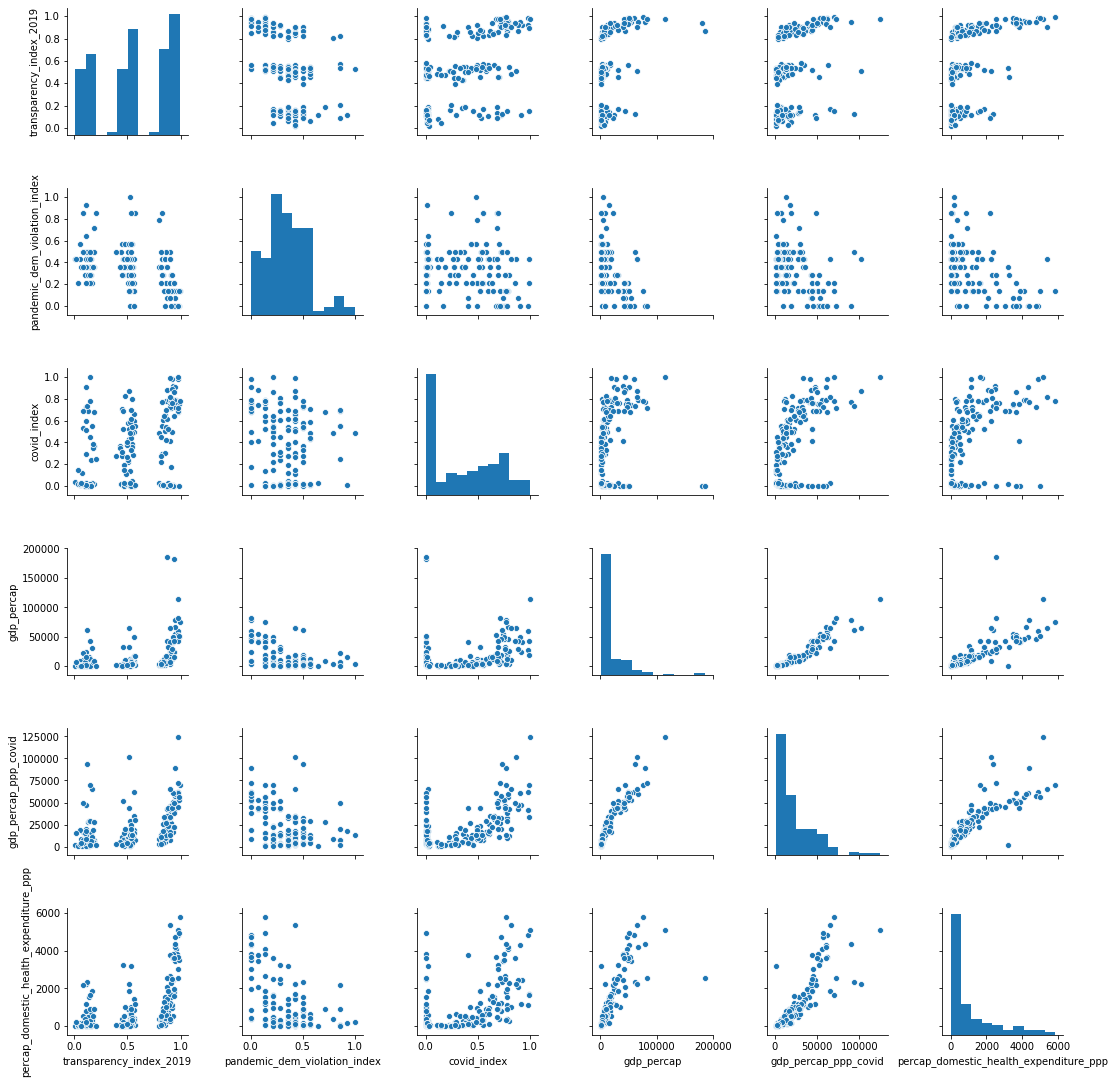

In [18]:
#pp = sns.pairplot(data = covid_df, vars=['transparency_index_2019', 'pandemic_dem_violation_index', 'covid_index', 'gdp_percap', 'gdp_percap_ppp_covid', 'percap_domestic_health_expenditure_ppp']) 

In [52]:
#COVID
reg_covid = smf.ols('covid_index ~ transparency_index_2019 + gdp_percap_ppp_covid + percap_domestic_health_expenditure_ppp + median_age + aged_65_older', covid_df).fit()

In [53]:
LRresult = reg_covid.summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.079224,0.120948,-0.655027,0.513357,-0.318018,0.159570
transparency_index_2019,0.068764,0.079589,0.863986,0.388842,-0.088373,0.225900
gdp_percap_ppp_covid,0.000007,0.000002,3.246821,0.001412,0.000003,0.000010
percap_domestic_health_expenditure_ppp,-0.000022,0.000033,-0.668516,0.504733,-0.000086,0.000043
median_age,0.008591,0.006241,1.376600,0.170490,-0.003730,0.020912
aged_65_older,0.003581,0.009110,0.393071,0.694772,-0.014405,0.021567


In [21]:
#Pandemic Democracy Violations
reg_pandemic_violations = smf.ols('pandemic_dem_violation_index ~ transparency_index_2019 + gdp_percap_ppp_covid + percap_domestic_health_expenditure_ppp + aged_65_older + median_age', covid_df).fit()

In [22]:
LRresult = reg_pandemic_violations.summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,3.248865e-01,0.100008,3.248609,0.001464,0.127102,0.522671
transparency_index_2019,-1.383298e-01,0.069534,-1.989387,0.048679,-0.275846,-0.000813
gdp_percap_ppp_covid,-8.427588e-07,0.000002,-0.492633,0.623072,-0.000004,0.000003
percap_domestic_health_expenditure_ppp,-3.840644e-05,0.000026,-1.470562,0.143737,-0.000090,0.000013
aged_65_older,-1.174270e-02,0.007691,-1.526886,0.129129,-0.026952,0.003467
median_age,8.325270e-03,0.005217,1.595861,0.112858,-0.001992,0.018642
